<a href="https://colab.research.google.com/github/Purohit1999/Data_Science/blob/main/Gradient_Boost.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

First 5 rows:
   Square_Footage  Num_Bedrooms  Num_Bathrooms  Year_Built  Lot_Size  \
0            1360             2              1        1981  0.599637   
1            4272             3              3        2016  4.753014   
2            3592             1              2        2016  3.634823   
3             966             1              2        1977  2.730667   
4            4926             2              1        1993  4.699073   

   Garage_Size  Neighborhood_Quality   House_Price  
0            0                     5  2.623829e+05  
1            1                     6  9.852609e+05  
2            0                     9  7.779774e+05  
3            1                     8  2.296989e+05  
4            0                     8  1.041741e+06  

Dataset Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 8 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Square_F

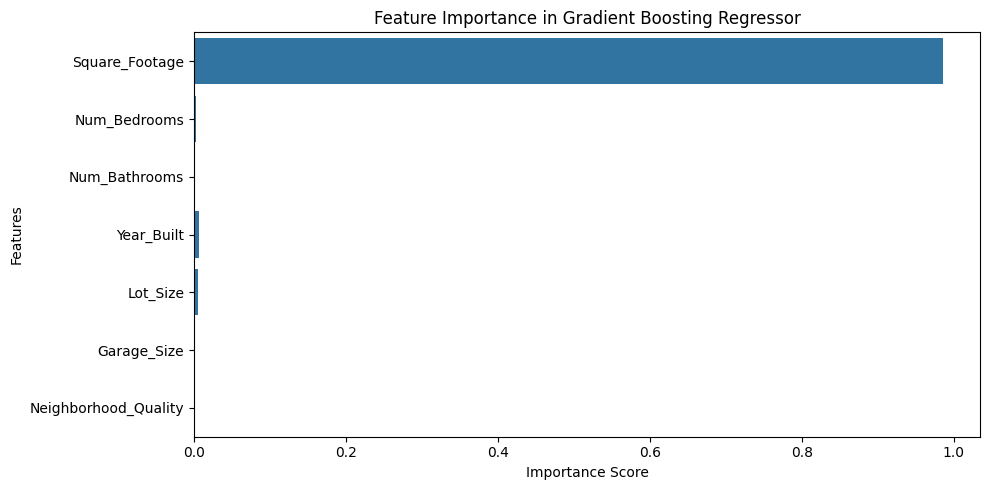

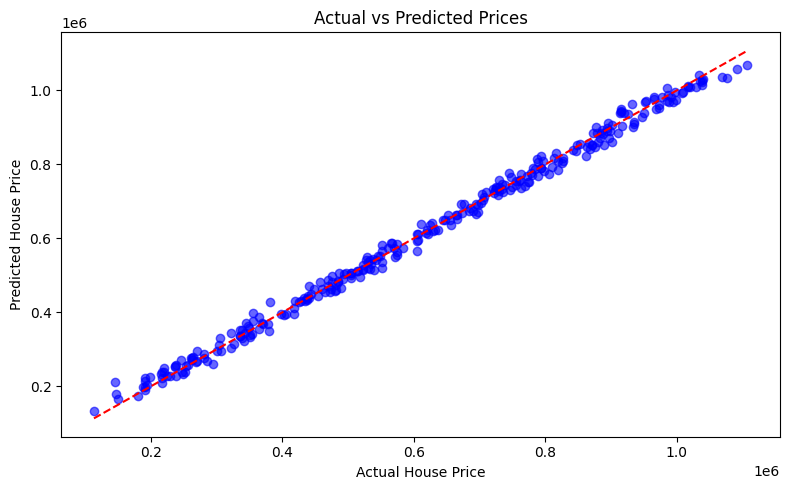

In [1]:
# ðŸ“¦ Importing Required Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.metrics import mean_absolute_error, r2_score

# ðŸ“¥ Load Dataset
df = pd.read_csv("house_price_regression_dataset.csv")

# ðŸ§¾ Quick Overview
print("First 5 rows:")
print(df.head())
print("\nDataset Info:")
print(df.info())

# âœ… Feature and Target Split
X = df.drop("House_Price", axis=1)
y = df["House_Price"]

# ðŸ”€ Train/Test Split
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, random_state=42
)

# ðŸ§  Train Gradient Boosting Regressor
model = GradientBoostingRegressor(
    n_estimators=100,       # number of boosting rounds
    learning_rate=0.05,     # shrinkage factor
    max_depth=4,            # tree depth
    random_state=42
)
model.fit(X_train, y_train)

# âœ… Model Evaluation
print("\nðŸ“Š Model Performance:")
print("Training RÂ²:", model.score(X_train, y_train))
print("Testing  RÂ²:", model.score(X_test, y_test))

# ðŸ§ª Predict and Evaluate
y_pred = model.predict(X_test)
print("Standalone r2_score      :", r2_score(y_test, y_pred))
print("Mean Absolute Error (MAE):", mean_absolute_error(y_test, y_pred))

# ðŸ“ˆ Feature Importance Plot
feature_importance = pd.Series(model.feature_importances_, index=X.columns)
plt.figure(figsize=(10, 5))
sns.barplot(x=feature_importance.values, y=feature_importance.index)
plt.title("Feature Importance in Gradient Boosting Regressor")
plt.xlabel("Importance Score")
plt.ylabel("Features")
plt.tight_layout()
plt.show()

# ðŸ“‰ Actual vs Predicted Plot
plt.figure(figsize=(8, 5))
plt.scatter(y_test, y_pred, alpha=0.6, color='blue')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--')
plt.xlabel("Actual House Price")
plt.ylabel("Predicted House Price")
plt.title("Actual vs Predicted Prices")
plt.tight_layout()
plt.show()


Noise = 3
  R2 Score: 0.9648
  Coef: 16.75
  Intercept: 0.05


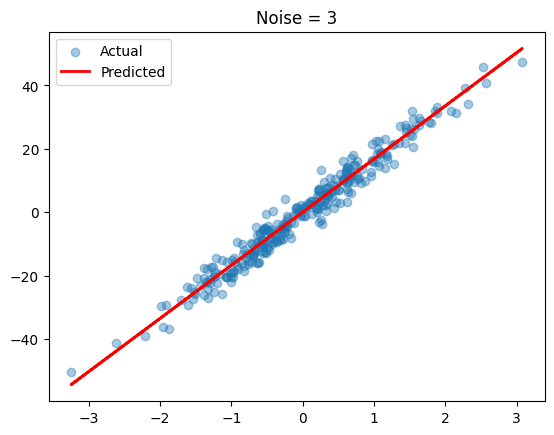

Noise = 5
  R2 Score: 0.9072
  Coef: 16.75
  Intercept: 0.08


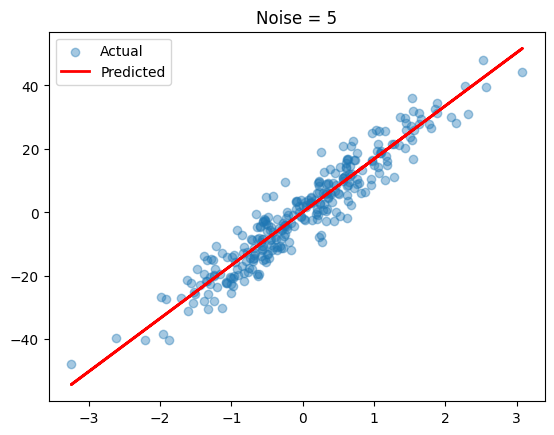

In [2]:
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score
from sklearn.datasets import make_regression
from sklearn.model_selection import train_test_split

# Try both noise levels
for noise in [3, 5]:
    X, y = make_regression(n_samples=1000, n_features=1, noise=noise, random_state=42)
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

    model = LinearRegression()
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)

    print(f"Noise = {noise}")
    print(f"  R2 Score: {r2_score(y_test, y_pred):.4f}")
    print(f"  Coef: {model.coef_[0]:.2f}")
    print(f"  Intercept: {model.intercept_:.2f}")

    plt.scatter(X_test, y_test, label="Actual", alpha=0.4)
    plt.plot(X_test, y_pred, color="red", label="Predicted", linewidth=2)
    plt.title(f"Noise = {noise}")
    plt.legend()
    plt.show()


In [3]:
from sklearn.datasets import make_regression
from sklearn.model_selection import train_test_split
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.metrics import r2_score

for noise in [0, 3, 5, 20]:
    X, y = make_regression(n_samples=1000, n_features=10, n_informative=1, noise=noise, random_state=42)
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

    model = GradientBoostingRegressor(random_state=42)
    model.fit(X_train, y_train)

    print(f"Noise: {noise}")
    print(f"  Train RÂ²: {model.score(X_train, y_train):.4f}")
    print(f"  Test  RÂ²: {model.score(X_test, y_test):.4f}\n")


Noise: 0
  Train RÂ²: 0.9999
  Test  RÂ²: 0.9994

Noise: 3
  Train RÂ²: 0.9957
  Test  RÂ²: 0.9859

Noise: 5
  Train RÂ²: 0.9885
  Test  RÂ²: 0.9713

Noise: 20
  Train RÂ²: 0.8660
  Test  RÂ²: 0.7282

